In [1]:
import pyspark
sc = pyspark.SparkContext()

In [2]:
from pyspark.sql import SQLContext
sql = SQLContext(sc)

In [3]:
from pyspark.mllib.tree import DecisionTree, DecisionTreeModel

In [4]:
df0 = (sql.read
         .format("com.databricks.spark.csv")
         .option("header", "true")
         .load("part-00000-b8558166-0954-4f48-baf1-8a4320ffa312-c000.csv"))

In [5]:
df1 = (sql.read
         .format("com.databricks.spark.csv")
         .option("header", "true")
         .load("part-00001-b8558166-0954-4f48-baf1-8a4320ffa312-c000.csv"))

In [6]:
df2 = (sql.read
         .format("com.databricks.spark.csv")
         .option("header", "true")
         .load("part-00002-b8558166-0954-4f48-baf1-8a4320ffa312-c000.csv"))

In [7]:
df3 = (sql.read
         .format("com.databricks.spark.csv")
         .option("header", "true")
         .load("part-00003-b8558166-0954-4f48-baf1-8a4320ffa312-c000.csv"))

In [8]:
df4 = (sql.read
         .format("com.databricks.spark.csv")
         .option("header", "true")
         .load("part-00004-b8558166-0954-4f48-baf1-8a4320ffa312-c000.csv"))

In [9]:
df5 = (sql.read
         .format("com.databricks.spark.csv")
         .option("header", "true")
         .load("part-00005-b8558166-0954-4f48-baf1-8a4320ffa312-c000.csv"))

In [10]:
df6 = (sql.read
         .format("com.databricks.spark.csv")
         .option("header", "true")
         .load("part-00006-b8558166-0954-4f48-baf1-8a4320ffa312-c000.csv"))

In [11]:
df7 = (sql.read
         .format("com.databricks.spark.csv")
         .option("header", "true")
         .load("part-00007-b8558166-0954-4f48-baf1-8a4320ffa312-c000.csv"))

In [12]:
#Joining two dataframes row wise
df0 = df0.union(df1)

In [15]:
df0 = df0.union(df2)

In [17]:
df0 = df0.union(df3)

In [20]:
df0 = df0.union(df4)

In [23]:
df0 = df0.union(df5)

In [26]:
df0 = df0.union(df6)

In [29]:
df0 = df0.union(df7)

In [31]:
df0.printSchema()

root
 |-- CASE_STATUS: string (nullable = true)
 |-- FULL_TIME_POSITION: string (nullable = true)
 |-- PREVAILING_WAGE: string (nullable = true)
 |-- YEAR: string (nullable = true)
 |-- STATE: string (nullable = true)
 |-- CITY: string (nullable = true)
 |-- SOC_NAME_CONVERTED: string (nullable = true)



In [32]:
df0 = df0.withColumn("PREVAILING_WAGE", df0["PREVAILING_WAGE"].cast("double"))

In [33]:
df0.printSchema()

root
 |-- CASE_STATUS: string (nullable = true)
 |-- FULL_TIME_POSITION: string (nullable = true)
 |-- PREVAILING_WAGE: double (nullable = true)
 |-- YEAR: string (nullable = true)
 |-- STATE: string (nullable = true)
 |-- CITY: string (nullable = true)
 |-- SOC_NAME_CONVERTED: string (nullable = true)



In [37]:
gdf0 = df0.groupby('STATE').count()
gdf1 = df0.groupby('CASE_STATUS').count()
gdf2 = df0.groupby('FULL_TIME_POSITION').count()
gdf3 = df0.groupby('YEAR').count()
gdf4 = df0.groupby('SOC_NAME_CONVERTED').count()

In [38]:
gdf0.show(53)

+--------------------+------+
|               STATE| count|
+--------------------+------+
|          NEW JERSEY|207631|
|           WISCONSIN| 31772|
|        PENNSYLVANIA|107258|
|            ILLINOIS|156234|
|DISTRICT OF COLUMBIA| 22008|
|            MARYLAND| 54451|
|       WEST VIRGINIA|  2947|
|            MISSOURI| 33716|
|               IDAHO|  4038|
|             MONTANA|   951|
|                  NA|  3444|
|            MICHIGAN| 80525|
|             FLORIDA|102694|
|              OREGON| 22998|
|        SOUTH DAKOTA|  1827|
|           LOUISIANA| 11059|
|              ALASKA|  1363|
|         PUERTO RICO|  1419|
|               MAINE|  3812|
|       NEW HAMPSHIRE|  9603|
|            OKLAHOMA| 10237|
|            VIRGINIA| 87514|
|          WASHINGTON|100126|
|      NORTH CAROLINA| 77536|
|             WYOMING|   860|
|               TEXAS|285407|
|            NEBRASKA|  9009|
|           MINNESOTA| 47417|
|              HAWAII|  3644|
|        RHODE ISLAND| 11455|
|         

In [39]:
gdf0.write \
    .format('csv') \
    .option("header","true")\
    .save('Num_Applns_By_State.csv')

In [40]:
from pyspark.sql.functions import col, avg
df_AvgWage_State = df0.groupby('STATE').agg(avg(col("PREVAILING_WAGE")))

In [41]:
df_AvgWage_State.show(53)

+--------------------+--------------------+
|               STATE|avg(PREVAILING_WAGE)|
+--------------------+--------------------+
|          NEW JERSEY|  140182.30561756206|
|           WISCONSIN|  107230.65463773134|
|        PENNSYLVANIA|   136099.7945494042|
|            ILLINOIS|   181559.1439334588|
|DISTRICT OF COLUMBIA|  151285.93113931295|
|            MARYLAND|   145933.4359473655|
|       WEST VIRGINIA|  197593.90529351874|
|            MISSOURI|   130859.2109885514|
|               IDAHO|   157935.9954878653|
|             MONTANA|   64427.37279705572|
|                  NA|  239961.76235191638|
|            MICHIGAN|  135705.08508127904|
|             FLORIDA|  138437.59474448368|
|              OREGON|   138701.0493969041|
|        SOUTH DAKOTA|  250261.11043240284|
|           LOUISIANA|  138617.72813274257|
|              ALASKA|  250427.46387380778|
|         PUERTO RICO|   49391.92097251586|
|               MAINE|  177254.31569254986|
|       NEW HAMPSHIRE|      9767

In [42]:
gdf1.show()

+-------------------+-------+
|        CASE_STATUS|  count|
+-------------------+-------+
|          CERTIFIED|2615597|
|CERTIFIED-WITHDRAWN| 202655|
|             DENIED|  94283|
+-------------------+-------+



In [43]:
gdf2.show()

+------------------+-------+
|FULL_TIME_POSITION|  count|
+------------------+-------+
|                 Y|2500996|
|                 N| 411539|
+------------------+-------+



In [44]:
gdf3.show()

+----+------+
|YEAR| count|
+----+------+
|2016|625910|
|2012|404846|
|2014|503372|
|2013|430495|
|2011|348654|
|2015|599258|
+----+------+



In [45]:
gdf4.show()

+------------------+-------+
|SOC_NAME_CONVERTED|  count|
+------------------+-------+
|                 0|1620028|
|                 1|1292507|
+------------------+-------+



In [46]:
newdf1 = df0.filter(df0["CASE_STATUS"]!='DENIED')

In [47]:
newdf1.select('CASE_STATUS').distinct().count()

2

In [48]:
newdf2 = df0.filter(df0["CASE_STATUS"]=='DENIED')

In [49]:
newdf2.select('CASE_STATUS').distinct().count()

1

In [50]:
from pyspark.sql.functions import lit

newdf1 = newdf1.withColumn('TARGET', lit(0))
newdf2 = newdf2.withColumn('TARGET', lit(1))

In [51]:
newdf1 = newdf1.union(newdf2)

In [53]:
newdf1.printSchema()

root
 |-- CASE_STATUS: string (nullable = true)
 |-- FULL_TIME_POSITION: string (nullable = true)
 |-- PREVAILING_WAGE: double (nullable = true)
 |-- YEAR: string (nullable = true)
 |-- STATE: string (nullable = true)
 |-- CITY: string (nullable = true)
 |-- SOC_NAME_CONVERTED: string (nullable = true)
 |-- TARGET: integer (nullable = false)



In [54]:
#Dropping column from dataframe
newdf1 = newdf1.drop("CASE_STATUS")

In [55]:
newdf1 = newdf1.withColumn("TARGET", newdf1["TARGET"].cast("string"))

In [56]:
newdf1.printSchema()

root
 |-- FULL_TIME_POSITION: string (nullable = true)
 |-- PREVAILING_WAGE: double (nullable = true)
 |-- YEAR: string (nullable = true)
 |-- STATE: string (nullable = true)
 |-- CITY: string (nullable = true)
 |-- SOC_NAME_CONVERTED: string (nullable = true)
 |-- TARGET: string (nullable = false)



In [57]:
newdf1 = newdf1.drop("CITY")

In [58]:
newdf1.show()

+------------------+---------------+----+--------------------+------------------+------+
|FULL_TIME_POSITION|PREVAILING_WAGE|YEAR|               STATE|SOC_NAME_CONVERTED|TARGET|
+------------------+---------------+----+--------------------+------------------+------+
|                 Y|       132475.0|2016|            NEW YORK|                 1|     0|
|                 Y|       114483.0|2016|            NEW YORK|                 1|     0|
|                 Y|       111654.0|2016|               TEXAS|                 1|     0|
|                 Y|        90000.0|2016|          CALIFORNIA|                 1|     0|
|                 Y|       106900.0|2016|            VIRGINIA|                 1|     0|
|                 Y|       115600.0|2016|          CALIFORNIA|                 1|     0|
|                 Y|       127358.0|2016|            NEW YORK|                 1|     0|
|                 Y|       186098.0|2016|            NEW YORK|                 1|     0|
|                 Y| 

In [59]:
cols = newdf1.columns

In [60]:
cols

['FULL_TIME_POSITION',
 'PREVAILING_WAGE',
 'YEAR',
 'STATE',
 'SOC_NAME_CONVERTED',
 'TARGET']

In [61]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler

In [62]:
categoricalColumns = ["FULL_TIME_POSITION", "YEAR", "STATE", "SOC_NAME_CONVERTED"]

In [63]:
stages = []

In [64]:
for categoricalCol in categoricalColumns:
    stringIndexer = StringIndexer(inputCol=categoricalCol, outputCol=categoricalCol+"Index")
    encoder = OneHotEncoder(inputCol=stringIndexer.getOutputCol(), outputCol=categoricalCol+"classVec")
    stages += [stringIndexer, encoder]
label_stringIdx = StringIndexer(inputCol = "TARGET", outputCol = "label")
stages += [label_stringIdx]

numericCols = ["PREVAILING_WAGE"]
newcatcol = []

In [65]:
for categoricalCol in categoricalColumns:
     newcatcol.append(categoricalCol + "classVec")
assemblerInputs = newcatcol + numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

pipeline = Pipeline(stages=stages)
pipelineModel = pipeline.fit(newdf1)
df = pipelineModel.transform(newdf1)

selectedcols = ["label", "features"]+cols
df = df.select(selectedcols)
display(df)

DataFrame[label: double, features: vector, FULL_TIME_POSITION: string, PREVAILING_WAGE: double, YEAR: string, STATE: string, SOC_NAME_CONVERTED: string, TARGET: string]

In [66]:
df.show()

+-----+--------------------+------------------+---------------+----+--------------------+------------------+------+
|label|            features|FULL_TIME_POSITION|PREVAILING_WAGE|YEAR|               STATE|SOC_NAME_CONVERTED|TARGET|
+-----+--------------------+------------------+---------------+----+--------------------+------------------+------+
|  0.0|(60,[0,1,8,59],[1...|                 Y|       132475.0|2016|            NEW YORK|                 1|     0|
|  0.0|(60,[0,1,8,59],[1...|                 Y|       114483.0|2016|            NEW YORK|                 1|     0|
|  0.0|(60,[0,1,7,59],[1...|                 Y|       111654.0|2016|               TEXAS|                 1|     0|
|  0.0|(60,[0,1,6,59],[1...|                 Y|        90000.0|2016|          CALIFORNIA|                 1|     0|
|  0.0|(60,[0,1,16,59],[...|                 Y|       106900.0|2016|            VIRGINIA|                 1|     0|
|  0.0|(60,[0,1,6,59],[1...|                 Y|       115600.0|2016|    

In [67]:
(subset40PctData, restData) = df.randomSplit([0.4, 0.6], seed = 100)
print(subset40PctData.count())

1165439


In [68]:
print(restData.count())

1747096


In [69]:
(trainingData, testData) = subset40PctData.randomSplit([0.7, 0.3], seed = 100)
print(trainingData.count())

816201


In [70]:
print(testData.count())

349238


In [71]:
#from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import RandomForestClassifier

In [72]:
import time

In [73]:
start_time = time.time()
rf = RandomForestClassifier(labelCol="label", featuresCol="features")
rfModel = rf.fit(trainingData)
predictions = rfModel.transform(testData)
print("---%s seconds----"%(time.time()-start_time))

---46.36945104598999 seconds----


In [74]:
predictions.printSchema()

root
 |-- label: double (nullable = true)
 |-- features: vector (nullable = true)
 |-- FULL_TIME_POSITION: string (nullable = true)
 |-- PREVAILING_WAGE: double (nullable = true)
 |-- YEAR: string (nullable = true)
 |-- STATE: string (nullable = true)
 |-- SOC_NAME_CONVERTED: string (nullable = true)
 |-- TARGET: string (nullable = false)
 |-- rawPrediction: vector (nullable = true)
 |-- probability: vector (nullable = true)
 |-- prediction: double (nullable = true)



In [75]:
selected = predictions.select("label", "prediction", "probability", "STATE", "TARGET", "YEAR")

In [76]:
display(selected)

DataFrame[label: double, prediction: double, probability: vector, STATE: string, TARGET: string, YEAR: string]

In [77]:
selected.count()

349238

In [78]:
selected.show()

+-----+----------+--------------------+----------+------+----+
|label|prediction|         probability|     STATE|TARGET|YEAR|
+-----+----------+--------------------+----------+------+----+
|  0.0|       0.0|[0.97984514765760...|CALIFORNIA|     0|2016|
|  0.0|       0.0|[0.97984514765760...|CALIFORNIA|     0|2016|
|  0.0|       0.0|[0.97984514765760...|CALIFORNIA|     0|2016|
|  0.0|       0.0|[0.97984514765760...|CALIFORNIA|     0|2016|
|  0.0|       0.0|[0.97984514765760...|CALIFORNIA|     0|2016|
|  0.0|       0.0|[0.97984514765760...|CALIFORNIA|     0|2016|
|  0.0|       0.0|[0.97984514765760...|CALIFORNIA|     0|2016|
|  0.0|       0.0|[0.97984514765760...|CALIFORNIA|     0|2016|
|  0.0|       0.0|[0.97984514765760...|CALIFORNIA|     0|2016|
|  0.0|       0.0|[0.97984514765760...|CALIFORNIA|     0|2016|
|  0.0|       0.0|[0.97984514765760...|CALIFORNIA|     0|2016|
|  0.0|       0.0|[0.97984514765760...|CALIFORNIA|     0|2016|
|  0.0|       0.0|[0.97984514765760...|CALIFORNIA|     

In [79]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Evaluate model
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction")
evaluator.evaluate(predictions)

0.719287476866666

In [80]:
evaluator.getMetricName()

'areaUnderROC'

In [81]:
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt

In [82]:
results = predictions.select(['probability', 'label'])

In [83]:
results_collect = results.collect()

In [84]:
results_list = [(float(i[0][0]), 1.0-float(i[1])) for i in results_collect]

In [85]:
fpr = dict()
tpr = dict()
roc_auc = dict()

In [86]:
y_test = [i[1] for i in results_list]
y_score = [i[0] for i in results_list]

In [87]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_score)
roc_auc = metrics.auc(fpr, tpr)

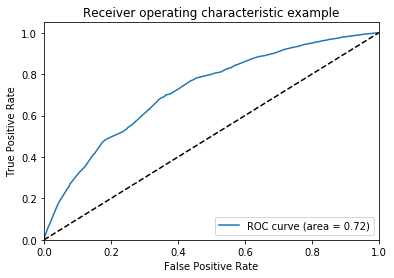

In [88]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()